In [1]:
# import modules
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# import main code
import sys
sys.path.append('/home/jannik/MA/fertige-MA/gitrepo')
from master_project import *

lal.MSUN_SI != Msun
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work
Loaded NRSur7dq4Remnant fit.
Loaded NRSur7dq4 model


In [6]:
# sample points
n = 2**10

# reference time
t_ref = -100

# spin magnitude
a = 0.8

# mass ratio 
q = 1 

# z spin componentes
chi1z = 0
chi2z = 0

### $\phi_1$ variation

In [3]:
# phi variation

theta1 = np.pi/2
chi2 = [0.8,0.,0.]
phis = np.linspace(0,2*np.pi,n)

s_max_ph = []
a_max_ph = []

for phi1 in phis:
    
    chi1x = a * np.sin(theta1) * np.cos(phi1)
    chi1y = a * np.sin(theta1) * np.sin(phi1)
    chi1z = a * np.cos(theta1)
    chi1 = [chi1x, chi1y, chi1z]
    
    f_ref = get_f_ref(q, chi1, chi2, t_ref)
    t, h_iner, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low, f_ref=f_ref)
    h_copr = modes_from_iner_to_new_frame(t, h_iner, frame='coprecessing')
    
    ampl_s_max = np.max(ampl_sym(h_copr, 2, 2))
    ampl_a_max = np.max(ampl_asym(h_copr, 2, 2))
    s_max_ph.append(ampl_s_max)
    a_max_ph.append(ampl_a_max)

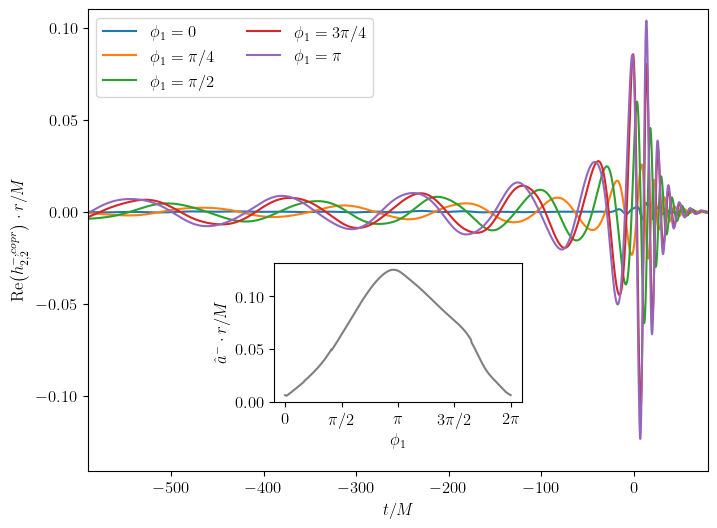

In [4]:
# setup plotting
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
axins = ax1.inset_axes([0.3, 0.15, 0.4, 0.3])


# varying ayimuthal angle of BH1
phi1s = [0., np.pi/4, np.pi/2, 3*np.pi/4 , np.pi]          
phi1sstr = ['0', '\pi/4', '\pi/2', '3\pi/4', '\pi']


# plot amplitudes
for i in range(len(phi1s)):
    
    phi1 = phi1s[i]
    chi1x = a * np.sin(theta1) * np.cos(phi1)
    chi1y = a * np.sin(theta1) * np.sin(phi1)
    chi1z = a * np.cos(theta1)
    chi1 = [chi1x, chi1y, chi1z]
    
    f_ref = get_f_ref(q, chi1, chi2, t_ref)
    t, h_iner, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low, f_ref=f_ref)
    h_copr = modes_from_iner_to_new_frame(t, h_iner, frame='coprecessing')
    
    ax1.plot(t, np.real(h_asym(h_copr, 2, 2)),label=r'$\phi_1=%s$' %phi1sstr[i])
        
ax1.set_ylabel(r'Re$\big(h_{2,2}^{-,copr}\big)\cdot r/M$')
ax1.set_ylim(-0.141,0.11)
ax1.set_xlim(-590,80)
ax1.set_xlabel('$t/M$')
#ax1.hlines(y=0., xmin=100, xmax=300, color='darkorange')
ax1.legend(loc='upper left', ncols=2)


# plot inset

#mark_inset(ax1, axins, fc="none", ec="0.5")
axins.plot(phis, a_max_ph, color='grey')
axins.set_ylabel(r'$\hat{a}^- \cdot r/M$')
axins.set_xlabel(r'$\phi_1$')
axins.set_xticks(np.arange(0, 2*np.pi+np.pi/2, step=(np.pi/2)), ['0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])

fig.savefig('phi_2BH.pdf')
plt.show()

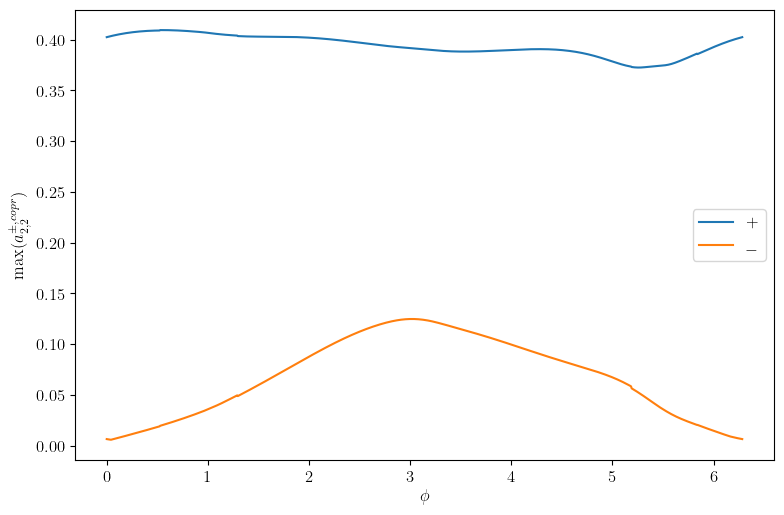

In [24]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(211)
     
ax1.plot(phis, s_max_ph, label='$+$')
ax1.plot(phis, a_max_ph, label='$-$')
ax1.set_ylabel('max$(a_{2,2}^{\pm,\,copr})$')
ax1.set_xlabel(r'$\phi$')
ax1.legend()
#ax1.set_ylim(.04, .07)
#ax1.set_xlim(-4300,100)

fig.tight_layout()
#fig.savefig('q_effect_superkick.pdf')
plt.show()

### $\alpha$ variation

In [18]:
# phi variation

alphas = np.linspace(0,2*np.pi,n)

s_max_alpha = []
a_max_alpha = []

for alpha in alphas:
    
    # chi1 and chi2 always anti-aligned and rotated both counterclockwise
    chi1x = np.cos(alpha) * a
    chi1y = np.sin(alpha) * a
    chi1 = [chi1x, chi1y, chi1z]
    chi2 = [-chi1x, -chi1y, -chi1z]
    
    f_ref = get_f_ref(q, chi1, chi2, t_ref)
    t, h_iner, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low, f_ref=f_ref)
    h_copr = modes_from_iner_to_new_frame(t, h_iner, frame='coprecessing')
    
    ampl_s_max = np.max(ampl_sym(h_copr, 2, 2))
    ampl_a_max = np.max(ampl_asym(h_copr, 2, 2))
    s_max_alpha.append(ampl_s_max)
    a_max_alpha.append(ampl_a_max)

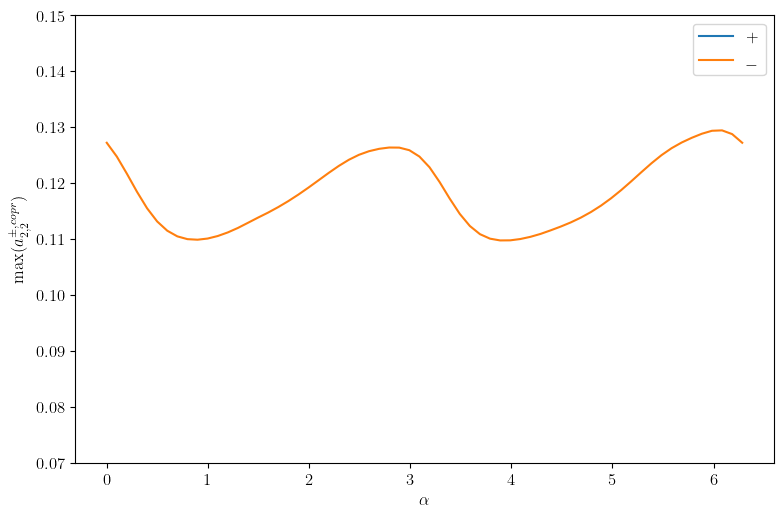

In [23]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(211)
     
ax1.plot(phis, s_max_alpha, label='$+$')
ax1.plot(phis, a_max_alpha, label='$-$')
ax1.set_ylabel('max$(a_{2,2}^{\pm,\,copr})$')
ax1.set_xlabel(r'$\alpha$')
ax1.legend()
ax1.set_ylim(.07, .15)
#ax1.set_xlim(-4300,100)

fig.tight_layout()
#fig.savefig('q_effect_superkick.pdf')
plt.show()

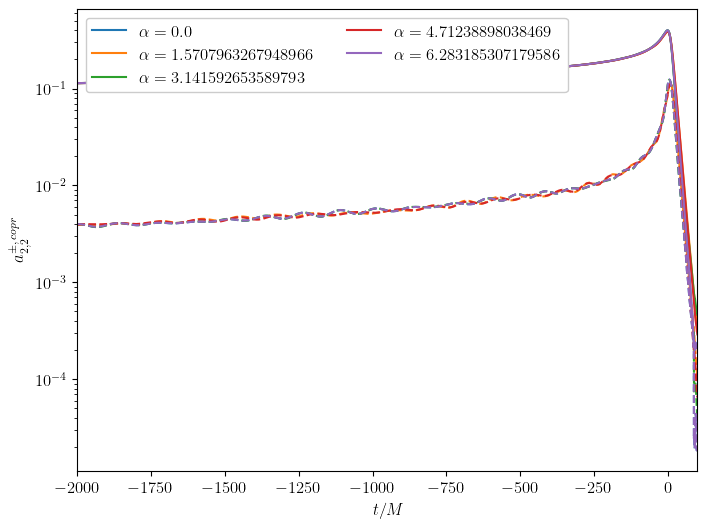

In [22]:
alphas5 = np.linspace(0, 2*np.pi, 5)

fig = plt.figure()
ax1 = fig.add_subplot(111)

for alpha in alphas5:
    
    # chi1 and chi2 always anti-aligned and rotated both counterclockwise
    chi1x = np.cos(alpha) * a
    chi1y = np.sin(alpha) * a
    chi1 = [chi1x, chi1y, chi1z]
    chi2 = [-chi1x, -chi1y, -chi1z]
    
    t, h_iner, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low)
    h_copr = modes_from_iner_to_new_frame(t, h_iner, frame='coprecessing')
    ampl_s = ampl_sym(h_copr, 2, 2)
    ampl_a = ampl_asym(h_copr, 2, 2)
    line, = ax1.semilogy(t, ampl_s, label=r'$\alpha=%s$' %alpha)
    ax1.semilogy(t, ampl_a, linestyle='--', color=line.get_color())

ax1.set_ylabel('$a_{2,2}^{\pm,\,copr}$')
ax1.set_xlabel('$t/M$')
ax1.legend(loc='upper left', framealpha=1, ncol=2)
#ax1.set_ylim(1.1*1e-3, .9)

ax1.set_xlim(-2000,100)

plt.show()

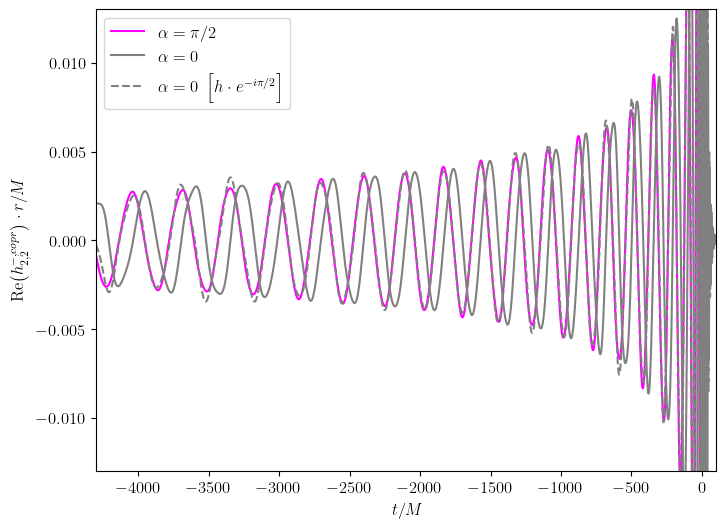

In [20]:
# setup plotting
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)


alpha = np.pi/2
chi1x = np.cos(alpha) * a
chi1y = np.sin(alpha) * a
chi1 = [chi1x, chi1y, chi1z]
chi2 = [-chi1x, -chi1y, -chi1z]
f_ref = get_f_ref(q, chi1, chi2, t_ref)
t, h_iner, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low, f_ref=f_ref)
h_copr = modes_from_iner_to_new_frame(t, h_iner, frame='coprecessing')
ax1.plot(t, np.real(h_asym(h_copr, 2, 2)), label=r'$\alpha=\pi/2$', color='magenta')


alpha = 0
chi1x = np.cos(alpha) * a
chi1y = np.sin(alpha) * a
chi1 = [chi1x, chi1y, chi1z]
chi2 = [-chi1x, -chi1y, -chi1z]
f_ref = get_f_ref(q, chi1, chi2, t_ref)
t, h_iner, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low, f_ref=f_ref)
h_copr = modes_from_iner_to_new_frame(t, h_iner, frame='coprecessing')
ax1.plot(t, np.real(h_asym(h_copr, 2, 2)), label=r'$\alpha=0$', color='grey')
ax1.plot(t, np.real(h_asym(h_copr, 2, 2)*np.exp(-1j*np.pi/2)), 
         '--', color='grey', label=r'$\alpha=0\,$  $\Big[h \cdot e^{-i\pi/2}\Big]$')


ax1.set_ylabel(r'Re$\big(h_{2,2}^{-,copr}\big)\cdot r/M$')
ax1.set_ylim(-0.013,0.013)
ax1.set_xlim(-4300,100)
ax1.set_xlabel('$t/M$')
ax1.legend(loc='upper left')

#fig.savefig('alpha_phase_shift.pdf')
plt.show()